In [102]:
import pandas as pd

In [103]:
pd.set_option('display.max_colwidth', 100)
data = pd.read_csv("SMSSpamCollection.txt", sep='\t', header=None)
data.columns = ['label', 'Content']

data.head()

,label,Content
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [104]:
df = data.copy()

In [105]:
data['content_len'] = data['Content'].apply(lambda x: len(x) - x.count(" "))

data.head()

,label,Content,content_len
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",92
1,ham,Ok lar... Joking wif u oni...,24
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
3,ham,U dun say so early hor... U c already then say...,39
4,ham,"Nah I don't think he goes to usf, he lives around here though",49


In [106]:
# taux des ponctuatuions
import string

def count_punctuation(text):
    binary_array = [1 for ch in text if ch in string.punctuation]
    nb_punctuation = sum(binary_array)
    total = len(text) - text.count(" ")
    return round(nb_punctuation/(total), 4)*100

In [107]:
data['punctuation_rate'] = data['Content'].apply(lambda x:count_punctuation(x))
data.head()

,label,Content,content_len,punctuation_rate
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",92,9.78
1,ham,Ok lar... Joking wif u oni...,24,25.00
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.69
3,ham,U dun say so early hor... U c already then say...,39,15.38
4,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.08


# Analyser les features

In [108]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

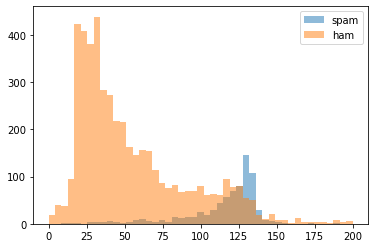

In [109]:
bins = np.linspace(0, 200, 48)

pyplot.hist(data[data['label'] == 'spam']['content_len'], bins, alpha=0.5, label='spam')
pyplot.hist(data[data['label'] == 'ham']['content_len'], bins, alpha=0.5, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

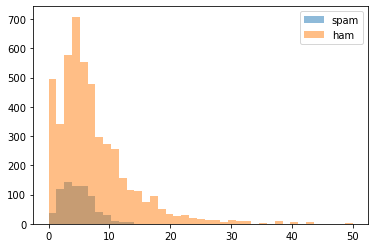

In [110]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data[data['label']=='spam']['punctuation_rate'], bins, alpha=0.5, label='spam')
pyplot.hist(data[data['label']=='ham']['punctuation_rate'], bins, alpha=0.5, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

# SVM 

In [111]:
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer

en_stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [112]:
def clean_email(text):
    result = "".join([ch for ch in text if ch not in string.punctuation])
    token = re.split("\W+", result)
    words = [ps.stem(word) for word in token if word not in en_stopwords]
    return words


vectorisation_full = CountVectorizer(analyzer=clean_email)
vect_final = vectorisation_full.fit_transform(data['Content'])

all_data = pd.concat([pd.DataFrame(vect_final.toarray()), data['content_len'], data['punctuation_rate']], axis=1)

In [113]:
all_data

,0,1,2,3,4,5,6,7,8,9,...,8185,8186,8187,8188,8189,8190,8191,8192,content_len,punctuation_rate
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,92,9.78
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,24,25.00
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,128,4.69
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,39,15.38
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49,4.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,131,6.11
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,29,3.45
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,48,14.58
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100,1.00


In [114]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split


In [115]:
X_train, X_test, y_train, y_test = train_test_split(all_data, data['label'], test_size=0.2, random_state= 42)

In [116]:
from sklearn import svm

In [117]:
alg_svm = svm.SVC(kernel='linear')

In [118]:
alg_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [119]:
predictions = alg_svm.predict(X_test)

In [120]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [121]:
len(predictions)

1115

In [122]:
len(y_test)

1115

In [124]:
len(predictions[predictions=='spam'])

151

In [125]:
len(y_test[y_test=='spam'])

149

# Model evaluation

In [126]:
precision, recall, fscore, _= score(y_test, predictions, pos_label='spam', average='binary')

In [127]:
print('Precision: {} / Recall: {} / Accuray:{}'.format(round(precision, 3), round(recall, 3), round(predictions == y_test).sum()/len(predictions),3))

Precision: 0.927 / Recall: 0.94 / Accuray:0.9820627802690582


# Croos validation k-fold

In [128]:
from sklearn.model_selection import KFold, cross_val_score

In [129]:
from sklearn import svm
alg_svm_cross_validation = svm.SVC(kernel= 'linear')

k_fold = KFold(n_splits=4)
cross_val_score(alg_svm_cross_validation, all_data, data['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.97774587, 0.9856425 , 0.9798995 , 0.98420675])

# SVM with tf-idf

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [131]:
vectorisation_full_idf = TfidfVectorizer(analyzer=clean_email)
vect_final_idf = vectorisation_full_idf.fit_transform(data['Content'])

all_data_idf = pd.concat([pd.DataFrame(vect_final_idf.toarray()), data['content_len'], data['punctuation_rate']], axis=1)

In [132]:
all_data_idf

,0,1,2,3,4,5,6,7,8,9,...,8185,8186,8187,8188,8189,8190,8191,8192,content_len,punctuation_rate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,92,9.78
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,24,25.00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,128,4.69
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,39,15.38
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,49,4.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,131,6.11
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.311086,0.0,0.0,29,3.45
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,48,14.58
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,100,1.00


In [133]:
X_train_idf, X_test_idf, y_train_idf, y_test_idf = train_test_split(all_data_idf, data['label'], test_size=0.2, random_state= 42)

In [134]:
alg_svm = svm.SVC(kernel='linear')

alg_svm.fit(X_train_idf, y_train_idf)



SVC(kernel='linear')

In [135]:
predictions_idf = alg_svm.predict(X_test_idf)

In [136]:
len(predictions[predictions_idf=='spam'])

139

In [137]:
len(y_test[y_test_idf=='spam'])

149

In [138]:
precision, recall, fscore, _= score(y_test_idf, predictions_idf, pos_label='spam', average='binary')

print('Precision: {} / Recall: {} / Accuray:{}'.format(round(precision, 3), 
                                                       round(recall, 3), 
                                                       round(predictions == y_test).sum()/len(predictions),3))

Precision: 0.978 / Recall: 0.913 / Accuray:0.9820627802690582


# Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier

alg_RandomForest = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
model = alg_RandomForest.fit(X_train_idf, y_train_idf)

In [140]:
sorted(zip(model.feature_importances_, X_train_idf.columns), reverse=True)[0:5]

[(0.09610832887369847, 'content_len'),
 (0.0357707255406833, 1820),
 (0.03198569867691879, 4840),
 (0.03038040520153551, 7424),
 (0.028214440540585792, 3160)]

In [141]:
predictions_rf = model.predict(X_test_idf)
precision, recall, fscore, _= score(y_test_idf, predictions_rf, pos_label='spam', average='binary')


In [142]:
len(predictions_rf[predictions_rf=='spam'])

96

In [143]:
len(y_test_idf[y_test_idf=='spam'])

149

In [144]:
print('Precision: {} / Recall: {} / Accuray:{}'.format(round(precision, 3), 
                                                       round(recall, 3), 
                                                       round(predictions_rf == y_test).sum()/len(predictions_rf),3))

Precision: 1.0 / Recall: 0.644 / Accuray:0.9524663677130045


# Cross validation with Random forest

In [145]:
alg_rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)

k_fold_rf = KFold(n_splits=4)
cross_val_score(alg_rf, all_data_idf, data['label'], cv=k_fold_rf, scoring='accuracy', n_jobs=-1)

C:\Users\Joel\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


array([0.94472362, 0.95118449, 0.94615937, 0.94544149])

# Hyperparametre SVM

In [146]:
def svm_hyper_params(kernel_value, gamma_value):
    alg_svm_hp = svm.SVC(kernel = kernel_value, gamma=gamma_value)
    model= alg_svm_hp.fit(X_train_idf, y_train_idf)
    predictions_hp = model.predict(X_test_idf)
    precision, recall, fscore, _= score(y_test_idf, predictions_hp, pos_label='spam', average='binary')

    print('gamma:{} / kernel:{} | Precision: {} / Recall: {}'.format(gamma_value, kernel_value,round(precision, 3), 
                                                       round(recall, 3)))

In [147]:
for kernel_value in ['linear', 'rbf']:
    for gamma in [0.01, 0.001]:
        svm_hyper_params(kernel_value, gamma)

gamma:0.01 / kernel:linear | Precision: 0.978 / Recall: 0.913
gamma:0.001 / kernel:linear | Precision: 0.978 / Recall: 0.913
gamma:0.01 / kernel:rbf | Precision: 0.685 / Recall: 0.51
gamma:0.001 / kernel:rbf | Precision: 0.654 / Recall: 0.57


# Hyper parametre Rf

In [148]:
def random_forest_hyper_params(n_decision_tree, depth):
    alg_rf_hp = RandomForestClassifier(n_estimators=n_decision_tree, max_depth=depth, n_jobs=-1)
    model = alg_rf_hp.fit(X_train_idf, y_train_idf)
    predictions = model.predict(X_test_idf)
    precison, recall, fscore, support = score(y_test_idf, predictions, pos_label='spam', average='binary')
    print('nb decision tree: {} / Depth: {} | Precision:{} / Recall: {}'.format(n_decision_tree, depth, round(precision, 3), round(recall, 3)))

In [149]:
for ith_decision_tree in [5, 20, 50, 100]:
    for depth in [10, 20, 30]:
        random_forest_hyper_params(ith_decision_tree, depth)

nb decision tree: 5 / Depth: 10 | Precision:1.0 / Recall: 0.282
nb decision tree: 5 / Depth: 20 | Precision:1.0 / Recall: 0.611
nb decision tree: 5 / Depth: 30 | Precision:1.0 / Recall: 0.671
nb decision tree: 20 / Depth: 10 | Precision:1.0 / Recall: 0.282
nb decision tree: 20 / Depth: 20 | Precision:1.0 / Recall: 0.624
nb decision tree: 20 / Depth: 30 | Precision:1.0 / Recall: 0.745
nb decision tree: 50 / Depth: 10 | Precision:1.0 / Recall: 0.268
nb decision tree: 50 / Depth: 20 | Precision:1.0 / Recall: 0.638
nb decision tree: 50 / Depth: 30 | Precision:1.0 / Recall: 0.752
nb decision tree: 100 / Depth: 10 | Precision:1.0 / Recall: 0.242
nb decision tree: 100 / Depth: 20 | Precision:1.0 / Recall: 0.638
nb decision tree: 100 / Depth: 30 | Precision:1.0 / Recall: 0.752


In [150]:
for ith_decision in [100, 150, 200]:
    for depth in [30, 40, 50]:
        random_forest_hyper_params(ith_decision, depth)

nb decision tree: 100 / Depth: 30 | Precision:1.0 / Recall: 0.752
nb decision tree: 100 / Depth: 40 | Precision:1.0 / Recall: 0.779
nb decision tree: 100 / Depth: 50 | Precision:1.0 / Recall: 0.832
nb decision tree: 150 / Depth: 30 | Precision:1.0 / Recall: 0.738
nb decision tree: 150 / Depth: 40 | Precision:1.0 / Recall: 0.792
nb decision tree: 150 / Depth: 50 | Precision:1.0 / Recall: 0.819
nb decision tree: 200 / Depth: 30 | Precision:1.0 / Recall: 0.738
nb decision tree: 200 / Depth: 40 | Precision:1.0 / Recall: 0.799
nb decision tree: 200 / Depth: 50 | Precision:1.0 / Recall: 0.812


In [151]:
for ith_decision in [100, 200]:
    for depth in [50, 100]:
        random_forest_hyper_params(ith_decision, depth)

nb decision tree: 100 / Depth: 50 | Precision:1.0 / Recall: 0.826
nb decision tree: 100 / Depth: 100 | Precision:1.0 / Recall: 0.839
nb decision tree: 200 / Depth: 50 | Precision:1.0 / Recall: 0.826
nb decision tree: 200 / Depth: 100 | Precision:1.0 / Recall: 0.846


In [152]:
for ith_decision in [200, 300]:
    for depth in [100, 200]:
        random_forest_hyper_params(ith_decision, depth)

nb decision tree: 200 / Depth: 100 | Precision:1.0 / Recall: 0.839
nb decision tree: 200 / Depth: 200 | Precision:1.0 / Recall: 0.846
nb decision tree: 300 / Depth: 100 | Precision:1.0 / Recall: 0.846
nb decision tree: 300 / Depth: 200 | Precision:1.0 / Recall: 0.852


# Grid search 

In [88]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [95]:
from sklearn.model_selection import GridSearchCV

## Grid with SVM 

In [101]:
alg_svm = svm.SVC()
params = {'kernel':['linear', 'rbf'],
         'gamma':[0.01, 0.001]}

hyper_params_grid = GridSearchCV(alg_svm, params, cv=4, n_jobs=-1)
Hyper_params_models = hyper_params_grid.fit(all_data_idf, data['label'])

KeyboardInterrupt: 

In [ ]:
pd.DataFrame(hyper_params_models.cv_results).sort_values('mean_test_score', ascending=False)[0:6]

## Grid with RandomForest

In [ ]:
alg_RandomForest = RandomForestClassifier()
params_rf = {'n_estimators':[5, 20, 50, 100],
            'max_depth':[10, 20, 30]}


hyper_params_grid = GridSearchCV(alg_RandomForest, params_rf, cv=4, n_jobs=-1)
Hyper_params_models = hyper_params_grid.fit(all_data_idf, data['label'])

In [ ]:
pd.DataFrame(hyper_params_models.cv_results).sort_values('mean_test_score', ascending=False)[0:6]